In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import imageio
import jax.numpy as jnp
from matplotlib import pyplot as plt
import struct

In [3]:
from tensorflow.python.summary.summary_iterator import summary_iterator

/Users/othmanesebbouh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
plt.style.use('ggplot')

rc = {"pdf.fonttype": 42, 'text.usetex': True,
      "axes.facecolor": 'w', "grid.color": 'D3D3D3'}
plt.rcParams.update(rc)
plt.style.use('seaborn-colorblind')

<ipython-input-4-cd52cf2968d0>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [5]:
src_dir = "pre_computed_runs/scGM/"
runs = ["scGM_l1_reg_0/events.out.tfevents.1696426560.scGM_l1_reg_0",
        "scGM_l12_reg_7.5/events.out.tfevents.1696428467.scGM_l12_reg_7.5",
        "scGM_l1_reg_1.5/events.out.tfevents.1696429748.scGM_l1_reg_1.5",
        "scGM_run_l1_reg_2/events.out.tfevents.1696430094.scGM_run_l1_reg_2"
       ]
ltas = [[] for run in runs]
for i, run in enumerate(runs):
    for e in summary_iterator(src_dir + run):    
        for v in e.summary.value:
            if v.tag == 'lta':
                ltas[i].append(v.simple_value)

custom_legend = [r'$\lambda=0 \; $',
                 r'$\ell_{1,2} \; \; \lambda=7.5 $',
                 r'$\ell_1 \; \; \; \; \lambda=1.5$',
                 r'$\ell_1 \; \; \; \; \lambda=2$']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


# Convergence plot for sparse experiments

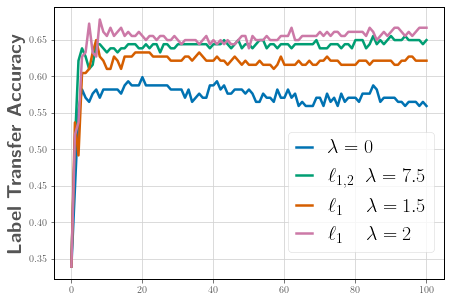

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))

for lta_run in ltas:
    plt.plot(lta_run, linewidth=2.5)
    plt.setp(ax.spines.values(), linewidth=1, color='black')
    
plt.ylabel(r"\textbf{Label Transfer Accuracy}", fontsize=20)
plt.legend(custom_legend, ncol=1, columnspacing=0.5, handlelength=0.8, fontsize=20, loc=(0.6, 0.1))
plt.savefig("plots/conv_plot_scGM.pdf", bbox_inches='tight', pad_inches=0.0)